In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
preview_data = pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0, 
                           nrows=5, usecols=range(6))
print(preview_data)
del preview_data
preview_labels = pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0, 
                           nrows=5)
print(preview_labels)
del preview_labels

          gene_0    gene_1    gene_2    gene_3     gene_4
sample_0     0.0  2.017209  3.265527  5.478487  10.431999
sample_1     0.0  0.592732  1.588421  7.586157   9.623011
sample_2     0.0  3.511759  4.327199  6.881787   9.870730
sample_3     0.0  3.663618  4.507649  6.659068  10.196184
sample_4     0.0  2.655741  2.821547  6.539454   9.738265
         Class
sample_0  PRAD
sample_1  LUAD
sample_2  PRAD
sample_3  PRAD
sample_4  BRCA


In [3]:
# 1. read data and labels
data = pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0)
labels = pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)

print(data.head())
print(data.info())
print(labels.head())

y = labels['Class']
X = data

          gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene

In [4]:
# 2. Split data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [5]:
# 3. Train a `LogisticRegression` classifier
model = sklearn.linear_model.LogisticRegression(max_iter=5000, tol=1e-4, multi_class='multinomial')
model.fit(X_train, y_train)

c:\Users\Cicada\anaconda3\envs\qbio\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'multinomial'


In [6]:
# 4. Evaluate the accuracy
y_pred = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"accuracy on test set: {accuracy:.4f}")

accuracy on test set: 0.9900


In [7]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99        75
        COAD       1.00      0.95      0.97        20
        KIRC       1.00      1.00      1.00        37
        LUAD       0.97      0.97      0.97        35
        PRAD       1.00      1.00      1.00        34

    accuracy                           0.99       201
   macro avg       0.99      0.98      0.99       201
weighted avg       0.99      0.99      0.99       201



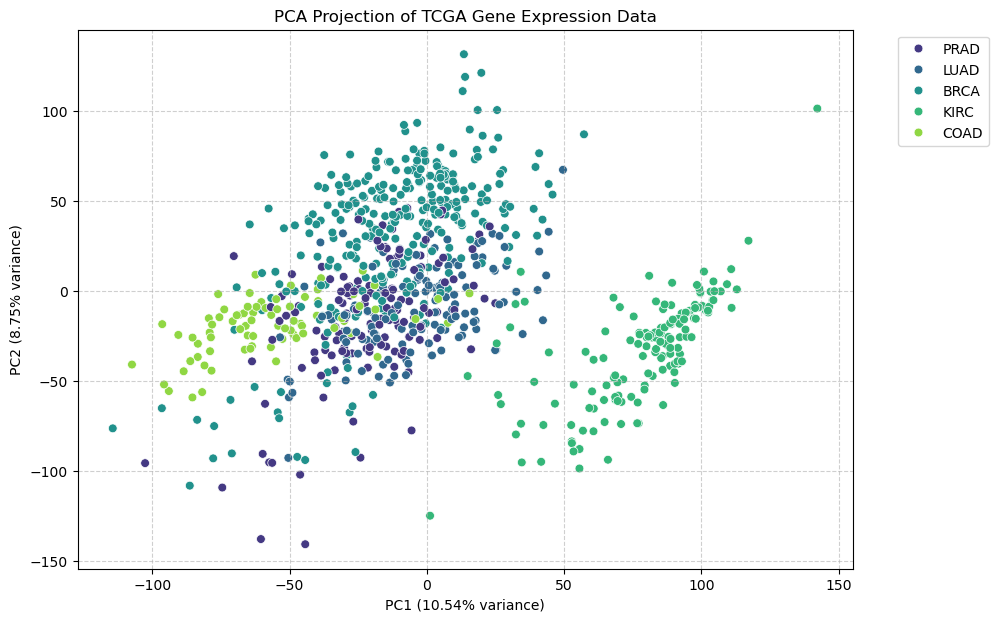

In [8]:
# 5. Bonus
X_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X) # normalize the data

pca = sklearn.decomposition.PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
pca_df['Subtype'] = y.values
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Subtype', palette='viridis', s=40)
plt.title('PCA Projection of TCGA Gene Expression Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- The PCA scatter plot reveals that the KIRC cluster is clearly distinguishable from other clusters, but the remaining clusters are difficult to separate from one another.